Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 67.00%
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       149
           1       0.24      0.14      0.17        51

    accuracy                           0.67       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.61      0.67      0.64       200

[[127  22]
 [ 44   7]]


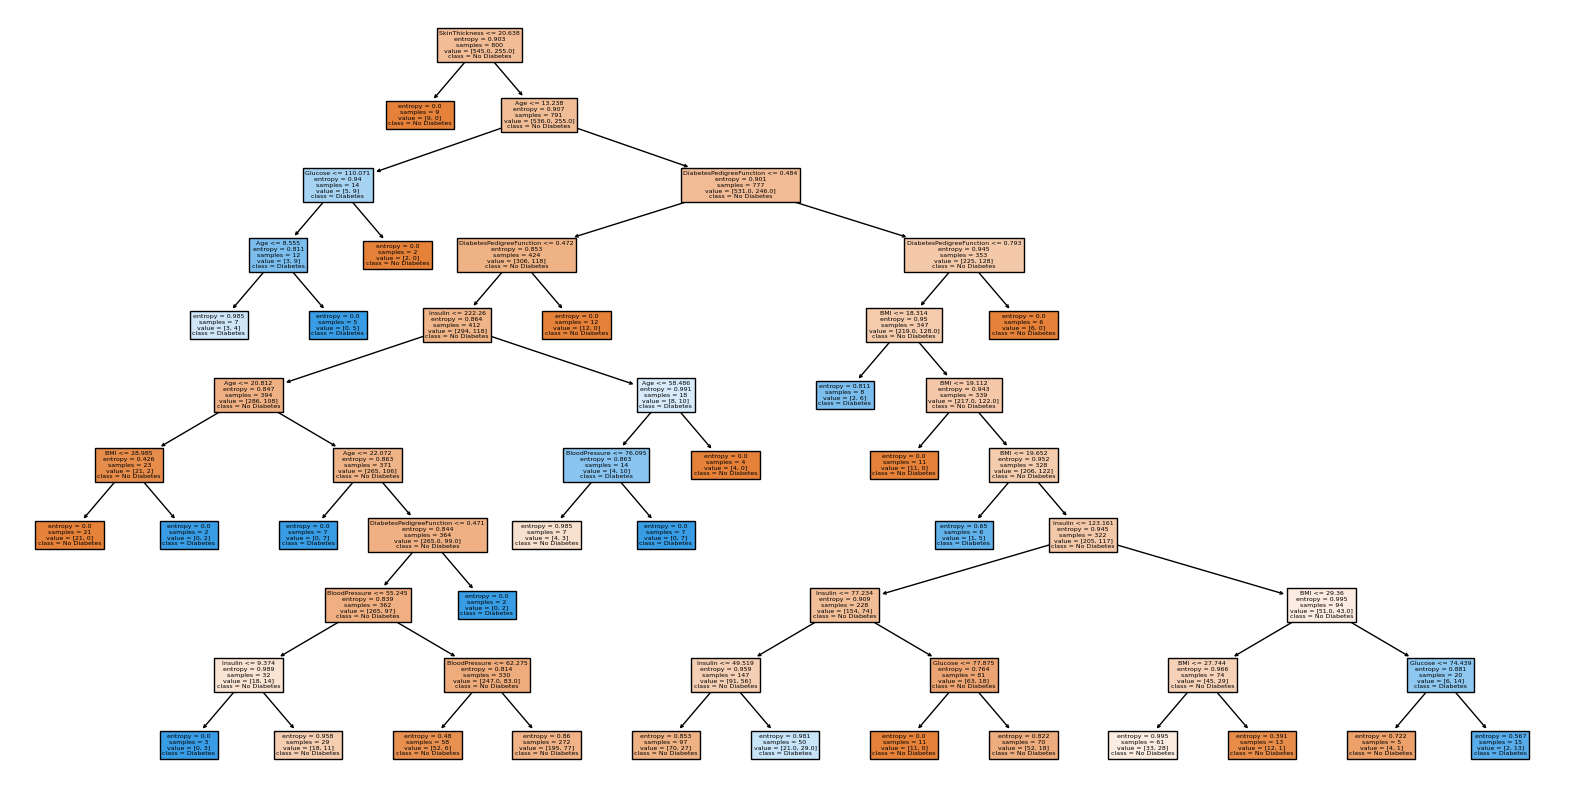

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = './data/Diabetes_prediction.csv'
df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred = grid_search.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree
best_clf = grid_search.best_estimator_
plt.figure(figsize=(20,10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy for training data: 74.88%
Accuracy for testing data: 67.00%
Classification Report for testing data:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       149
           1       0.24      0.14      0.17        51

    accuracy                           0.67       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.61      0.67      0.64       200

Confusion Matrix for testing data:
[[127  22]
 [ 44   7]]


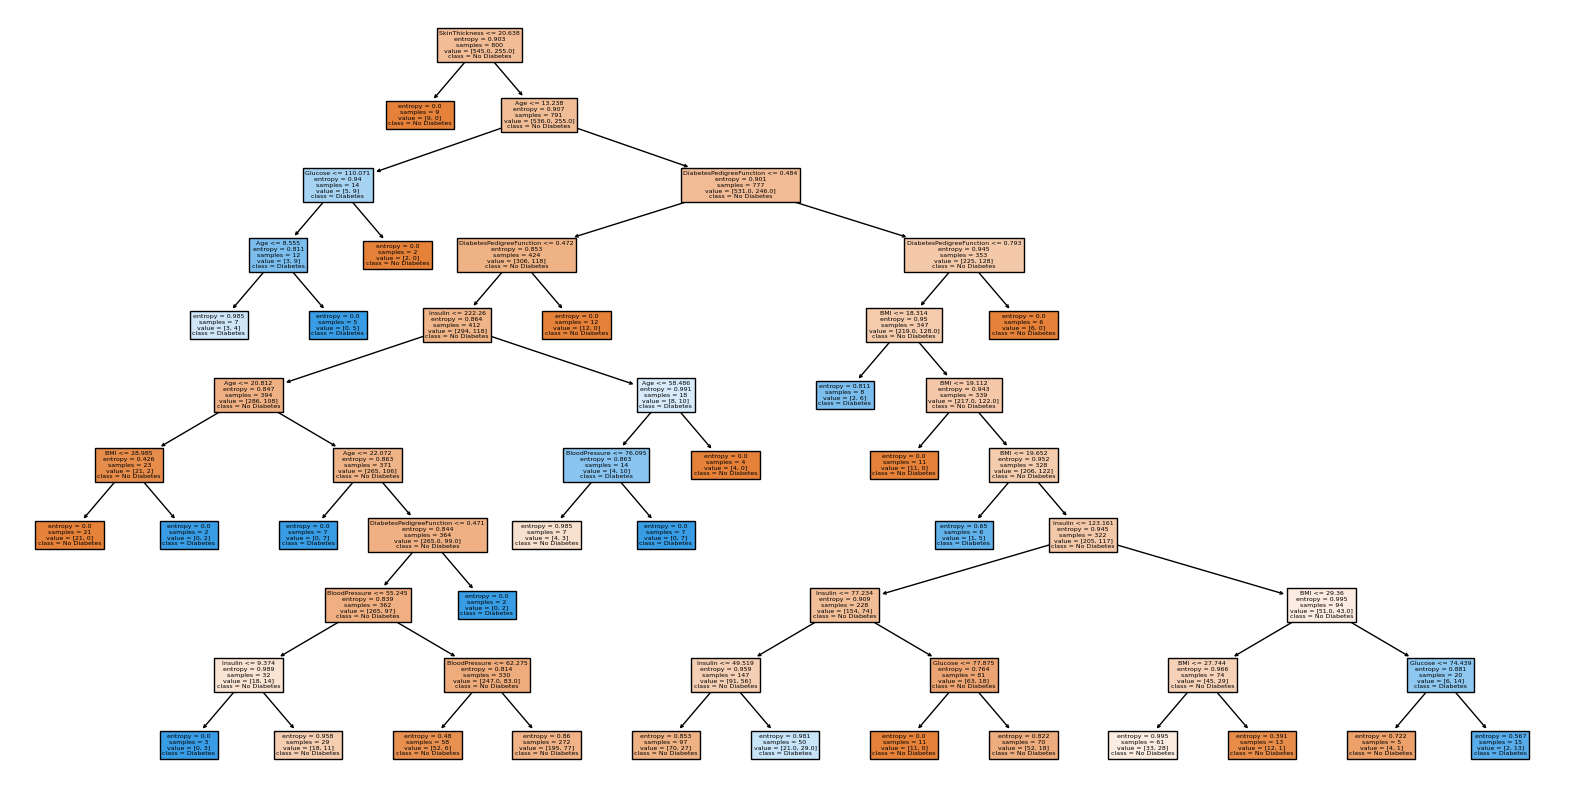

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = './data/Diabetes_prediction.csv'
df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

# Accuracy for training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy for training data: {accuracy_train * 100:.2f}%')

# Accuracy for testing data
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy for testing data: {accuracy_test * 100:.2f}%')

# Classification Report
print("Classification Report of Decision Tree Classifier for testing data:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("Confusion Matrix for testing data:")
print(confusion_matrix(y_test, y_pred_test))

# Visualize the decision tree
best_clf = grid_search.best_estimator_
plt.figure(figsize=(20,10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()


In [3]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual No Diabetes', 'Actual Diabetes'], columns=['Predicted No Diabetes', 'Predicted Diabetes'])

print("Confusion Matrix for testing data:")
print(conf_matrix_df)

Confusion Matrix for testing data:
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                    127                  22
Actual Diabetes                        44                   7


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data from CSV file
file_path = './data/Diabetes_prediction.csv'
df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize Random Forest classifier with regularization
clf = RandomForestClassifier(random_state=87, min_samples_split=5, min_samples_leaf=2, max_depth=20)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [None, 'sqrt', 'log2', 1, 2, 3, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

# Accuracy for training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy for training data: {accuracy_train * 100:.2f}%')

# Accuracy for testing data
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy for testing data: {accuracy_test * 100:.2f}%')

# Classification Report for testing data
print("Classification Report of Random Forest Classifier for testing data:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix for testing data
conf_matrix = confusion_matrix(y_test, y_pred_test)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual No Diabetes', 'Actual Diabetes'], columns=['Predicted No Diabetes', 'Predicted Diabetes'])

print("Confusion Matrix for testing data:")
print(conf_matrix_df)


Best Parameters: {'max_features': 1, 'n_estimators': 200}
Accuracy for training data: 98.75%
Accuracy for testing data: 73.50%
Classification Report for testing data:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       149
           1       0.00      0.00      0.00        51

    accuracy                           0.73       200
   macro avg       0.37      0.49      0.42       200
weighted avg       0.55      0.73      0.63       200

Confusion Matrix for testing data:
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                    147                   2
Actual Diabetes                        51                   0


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data from CSV file
file_path = './data/Diabetes_prediction.csv'
df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize XGBoost classifier
clf = XGBClassifier(random_state=42)

# Define hyperparameters grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred = grid_search.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification Report
print("Classification Report of XGB Classifier for testing data:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))



Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.7}
Accuracy: 74.50%
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.56      0.74      0.64       200

[[149   0]
 [ 51   0]]


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual No Diabetes', 'Actual Diabetes'], columns=['Predicted No Diabetes', 'Predicted Diabetes'])

print("Confusion Matrix:")
print(conf_matrix_df)

Confusion Matrix:
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                    149                   0
Actual Diabetes                        51                   0


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data from CSV file
file_path = './data/Diabetes_prediction.csv'
df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Calculate class weights
class_weights = len(y_train) / (2 * pd.value_counts(y_train))

# Initialize XGBoost classifier with class weights
clf = XGBClassifier(random_state=42, scale_pos_weight=class_weights[0])

# Define hyperparameters grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

# Accuracy for training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy for training data: {accuracy_train * 100:.2f}%')

# Accuracy for testing data
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy for testing data: {accuracy_test * 100:.2f}%')

# Classification Report for testing data
print("Classification Report of XGB Classifier for testing data:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix for testing data
print("Confusion Matrix for testing data:")
print(confusion_matrix(y_test, y_pred_test))


Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.7}
Accuracy for training data: 68.12%
Accuracy for testing data: 74.50%
Classification Report for testing data:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.56      0.74      0.64       200

Confusion Matrix for testing data:
[[149   0]
 [ 51   0]]


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data from CSV file
file_path = './data/Diabetes_prediction.csv'
df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize standard Logistic Regression classifier
log_reg = LogisticRegression(random_state=42, max_iter=10000)  # Increased max_iter for convergence

# Fit the Logistic Regression model
log_reg.fit(X_train, y_train)

# Predictions for Logistic Regression
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

# Accuracy for Logistic Regression on training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Logistic Regression Accuracy on Training Data: {accuracy_train * 100:.2f}%')

# Accuracy for Logistic Regression on testing data
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Logistic Regression Accuracy on Testing Data: {accuracy_test * 100:.2f}%')

# Classification Report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix for Logistic Regression
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Logistic Regression Accuracy on Training Data: 68.12%
Logistic Regression Accuracy on Testing Data: 74.50%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.56      0.74      0.64       200

Logistic Regression Confusion Matrix:
[[149   0]
 [ 51   0]]


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


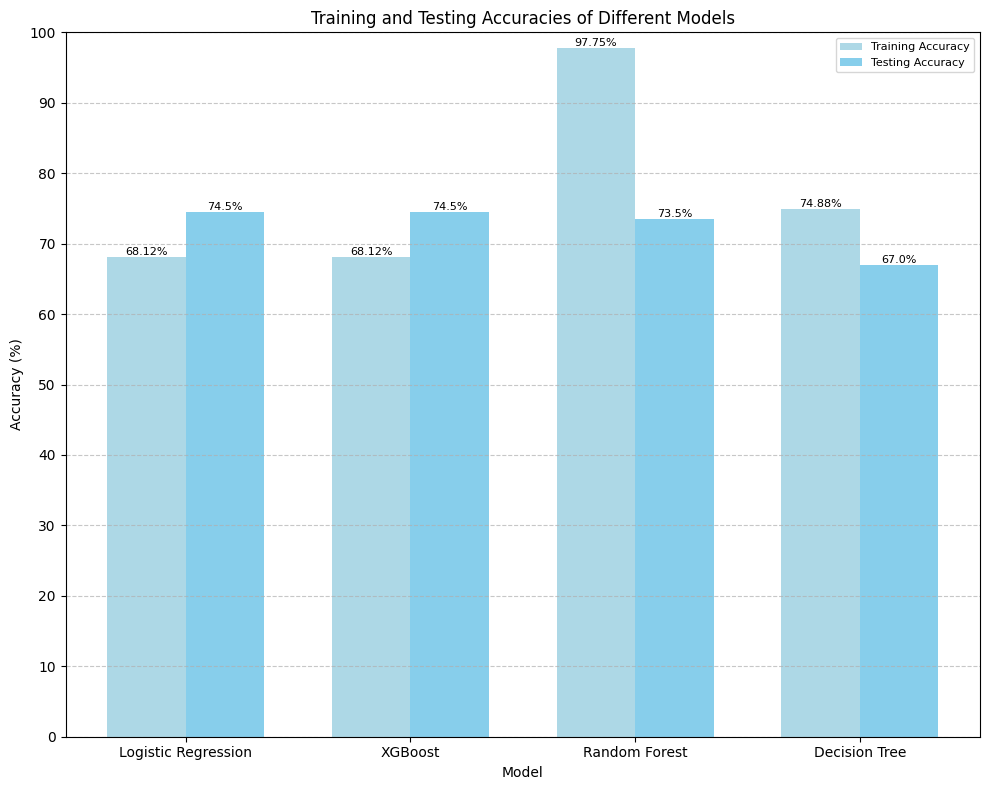

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Training and Testing Accuracies for each model
train_accuracies = {
    'Logistic Regression': 68.12,
    'Decision Tree': 74.88,
    'Random Forest': 97.75,
    'XGBoost': 68.12
}

test_accuracies = {
    'Logistic Regression': 74.50,
    'Decision Tree': 67.00,
    'Random Forest': 73.50,
    'XGBoost': 74.50
}

# Convert dictionaries to DataFrames
df_train = pd.DataFrame(list(train_accuracies.items()), columns=['Model', 'Accuracy'])
df_test = pd.DataFrame(list(test_accuracies.items()), columns=['Model', 'Accuracy'])

# Merge DataFrames on 'Model'
df_accuracies = pd.merge(df_train, df_test, on='Model', suffixes=('_train', '_test'))

# Sort DataFrame by Test Accuracy
df_accuracies = df_accuracies.sort_values(by='Accuracy_test', ascending=False)

# Plotting
plt.figure(figsize=(10, 8), dpi=100)  # Reduced figure size and increased DPI
bar_width = 0.35
index = np.arange(len(df_accuracies['Model']))

train_bars = plt.bar(index - bar_width/2, df_accuracies['Accuracy_train'], bar_width, color='lightblue', label='Training Accuracy')
test_bars = plt.bar(index + bar_width/2, df_accuracies['Accuracy_test'], bar_width, color='skyblue', label='Testing Accuracy')

# Adding text labels on each bar
for bar in train_bars + test_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval , f"{round(yval, 2)}%", ha='center', va='bottom', fontsize=8)

plt.xlabel('Model', fontsize=10)
plt.ylabel('Accuracy (%)', fontsize=10)
plt.title('Training and Testing Accuracies of Different Models', fontsize=12)
plt.xticks(index, df_accuracies['Model'], rotation=0, fontsize=10)
plt.yticks(np.arange(0, 101, 10))  # Setting y-axis scale from 0 to 100 with intervals of 10
plt.ylim(0, 100)  # Setting y-axis limits
plt.legend(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [11]:
import matplotlib.pyplot as plt

# Classification Reports for testing data
decision_tree_report = """
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       149
           1       0.24      0.14      0.17        51
"""

random_forest_report = """
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       149
           1       0.00      0.00      0.00        51
"""

xgboost_report = """
XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51
"""

logistic_regression_report = """
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51
"""

# Combine classification reports
combined_report = f"""
Combined Classification Report:

{decision_tree_report.strip()}
{'-'*50}
{random_forest_report.strip()}
{'-'*50}
{xgboost_report.strip()}
{'-'*50}
{logistic_regression_report.strip()}
"""

print(combined_report)



Combined Classification Report:

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       149
           1       0.24      0.14      0.17        51
--------------------------------------------------
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       149
           1       0.00      0.00      0.00        51
--------------------------------------------------
XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51
--------------------------------------------------
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51



In [13]:
import matplotlib.pyplot as plt

# Classification Reports for testing data
decision_tree_report = """
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       149
           1       0.24      0.14      0.17        51
"""

random_forest_report = """
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       149
           1       0.00      0.00      0.00        51
"""

xgboost_report = """
XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51
"""

logistic_regression_report = """
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51
"""

# Combine classification reports
combined_report = f"""
Combined Classification Report:

{decision_tree_report.strip()}
{'-'*50}
{random_forest_report.strip()}
{'-'*50}
{xgboost_report.strip()}
{'-'*50}
{logistic_regression_report.strip()}
"""

print(combined_report)


Combined Classification Report:

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       149
           1       0.24      0.14      0.17        51
--------------------------------------------------
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       149
           1       0.00      0.00      0.00        51
--------------------------------------------------
XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51
--------------------------------------------------
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51

